In [127]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [128]:
df = pd.read_csv(r"C:\Users\Rahul\Desktop\Data Science\omkar sir\Machine Learning\Classification\data\pancrative_cancer.csv")

In [129]:
df.head(1)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.0


In [130]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [131]:
# Ratio of missing values
round(df.isna().sum()/len(df) * 100, 2)

sample_id                   0.00
patient_cohort              0.00
sample_origin               0.00
age                         0.00
sex                         0.00
diagnosis                   0.00
stage                      66.27
benign_sample_diagnosis    64.75
plasma_CA19_9              40.68
creatinine                  0.00
LYVE1                       0.00
REG1B                       0.00
TFF1                        0.00
REG1A                      48.14
dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [133]:
cat_var = df.select_dtypes(include="object").columns.to_list()
cat_var

['sample_id',
 'patient_cohort',
 'sample_origin',
 'sex',
 'stage',
 'benign_sample_diagnosis']

In [134]:
# for i in cat_var:
#     print(f"{i} ----",df[i].unique())

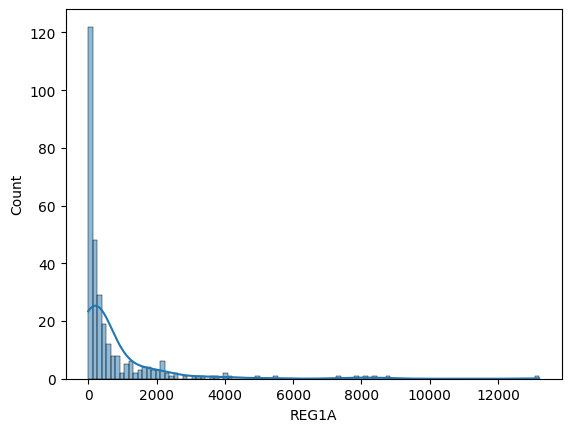

In [135]:
sns.histplot(df.REG1A, kde = True, bins = 100)
plt.show()

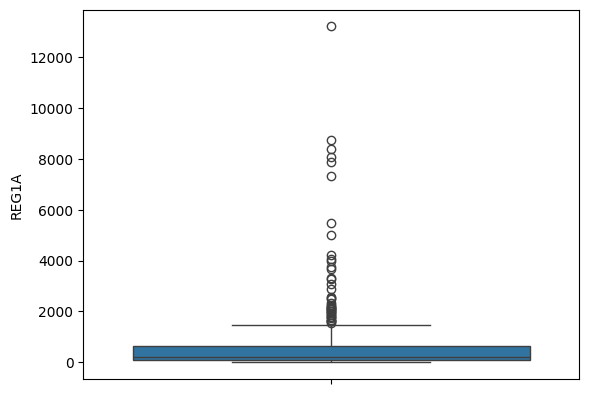

In [136]:
sns.boxplot(df.REG1A)
plt.show()

In [137]:
np.mean(df.REG1A), np.nanmedian(df.REG1A)


(735.2812222222221, 208.5385)

In [138]:
df.REG1A.value_counts()


REG1A
0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: count, Length: 298, dtype: int64

In [139]:
df['REG1A'].fillna(value = np.nanmedian(df['REG1A']), inplace=True)


C:\Users\Rahul\AppData\Local\Temp\ipykernel_21304\641792927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['REG1A'].fillna(value = np.nanmedian(df['REG1A']), inplace=True)


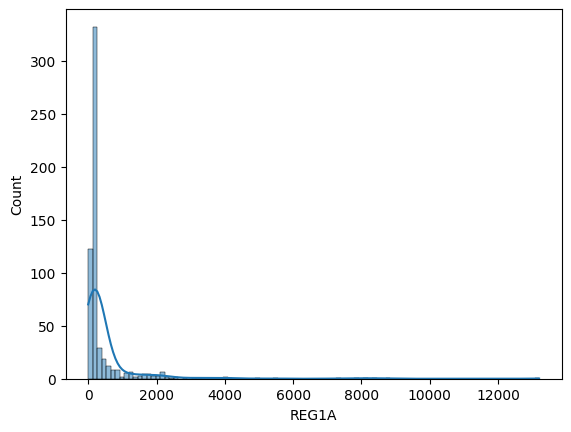

In [140]:
sns.histplot(df.REG1A, kde = True, bins = 100)
plt.show()

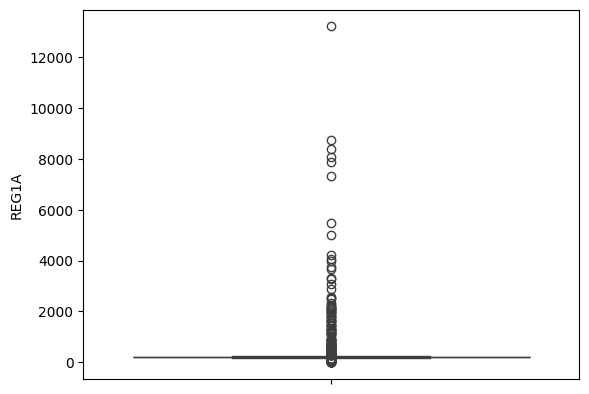

In [141]:
sns.boxplot(df.REG1A)
plt.show()

In [142]:
df.plasma_CA19_9.value_counts()


plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

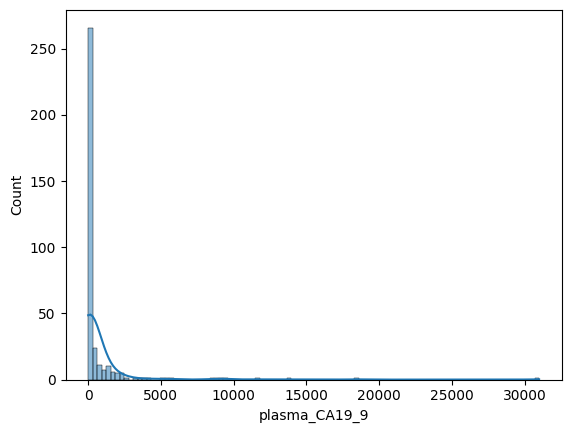

In [143]:
sns.histplot(df.plasma_CA19_9, kde = True, bins = 100)
plt.show()

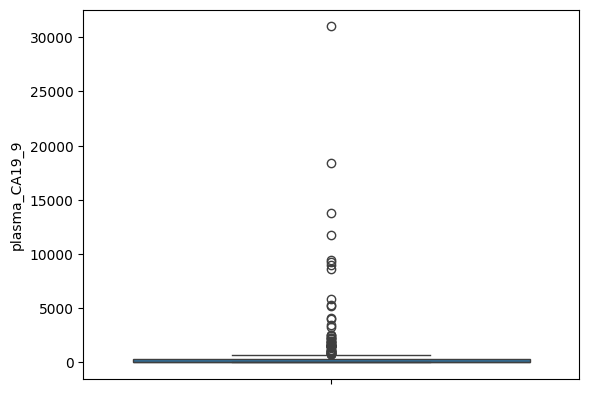

In [144]:
sns.boxplot(df.plasma_CA19_9)
plt.show()

In [145]:
np.mean(df.plasma_CA19_9), np.nanmedian(df.plasma_CA19_9) 


(654.0029437763428, 26.5)

In [146]:
df.plasma_CA19_9.value_counts()


plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

In [147]:
df['plasma_CA19_9'].fillna(value = np.nanmedian(df['plasma_CA19_9']), inplace=True)


C:\Users\Rahul\AppData\Local\Temp\ipykernel_21304\4236901431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['plasma_CA19_9'].fillna(value = np.nanmedian(df['plasma_CA19_9']), inplace=True)


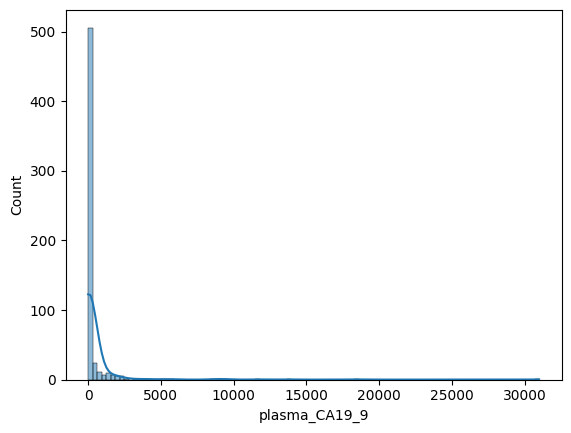

In [148]:
sns.histplot(df.plasma_CA19_9, kde = True, bins = 100)
plt.show()

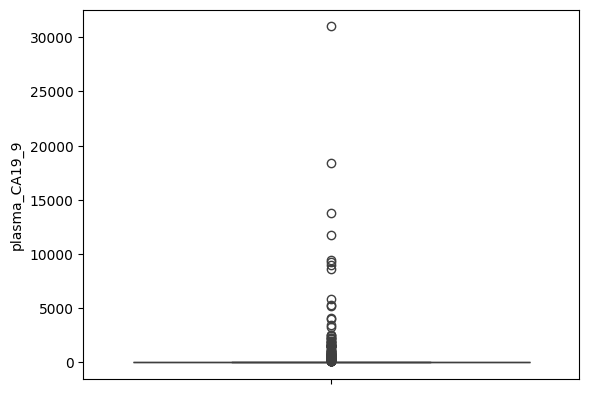

In [149]:
sns.boxplot(df.plasma_CA19_9)
plt.show()

In [150]:
df['benign_sample_diagnosis'].value_counts()


benign_sample_diagnosis
Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma            

In [151]:
df.loc[ (df.benign_sample_diagnosis.isna() == False) ]


,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
183,S271,Cohort2,BPTB,32,F,2,NaN,Abdominal Pain,12.0,1.16493,5.417692,21.135,445.72500,208.5385
184,S299,Cohort2,BPTB,59,F,2,NaN,Abdominal Pain,26.5,0.41847,0.526248,24.111,4.09000,208.5385
185,S308,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,26.5,0.36192,2.343091,12.957,0.02823,208.5385
186,S314,Cohort2,BPTB,39,F,2,NaN,Abdominal Pain,26.5,0.89349,0.736352,21.550,105.94300,208.5385
187,S315,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,13.0,0.37323,0.228904,13.977,7.36700,208.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,S360,Cohort2,BPTB,49,F,2,NaN,Serous cystadenoma - NOS,20.0,0.71253,0.632433,22.602,494.58800,208.5385
387,S259,Cohort2,BPTB,53,F,2,NaN,Serous microcystic adenoma,21.0,0.45240,0.963804,21.320,78.29200,208.5385
388,S300,Cohort2,BPTB,74,F,2,NaN,Serous microcystic adenoma,13.0,0.12441,0.000498,1.295,42.66700,208.5385
389,S302,Cohort2,BPTB,69,M,2,NaN,Serous microcystic adenoma,26.5,0.13572,0.000543,19.427,2.57800,208.5385


In [152]:
df.loc[ (df.benign_sample_diagnosis.isna() == False), 'diagnosis'].value_counts()


diagnosis
2    208
Name: count, dtype: int64

In [153]:
df.stage.value_counts()


stage
III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: count, dtype: int64

In [154]:
df.loc[ (df.stage.isna() == False), 'diagnosis'].value_counts()


diagnosis
3    199
Name: count, dtype: int64

In [155]:
df.drop(columns = ['benign_sample_diagnosis','stage'], inplace = True)


In [156]:
df.drop(columns = ['sample_id'], inplace=True)


<Axes: ylabel='patient_cohort'>

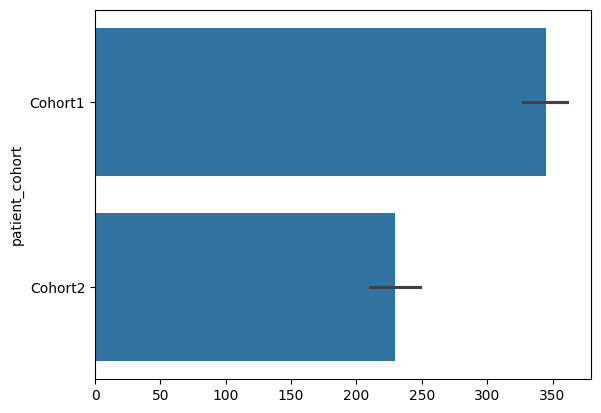

In [157]:
sns.barplot(df.patient_cohort)


<Axes: ylabel='sample_origin'>

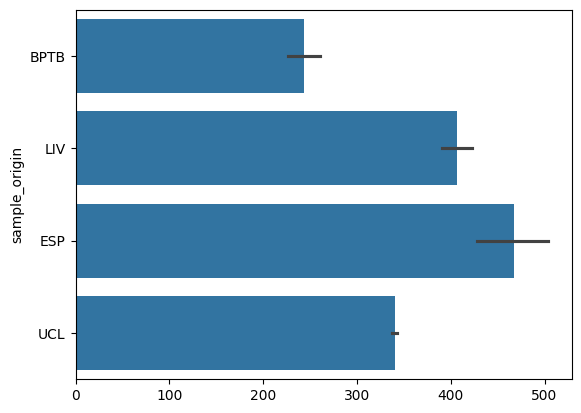

In [158]:
sns.barplot(df.sample_origin)


In [159]:
df.drop(columns = ['sample_origin'], inplace=True)


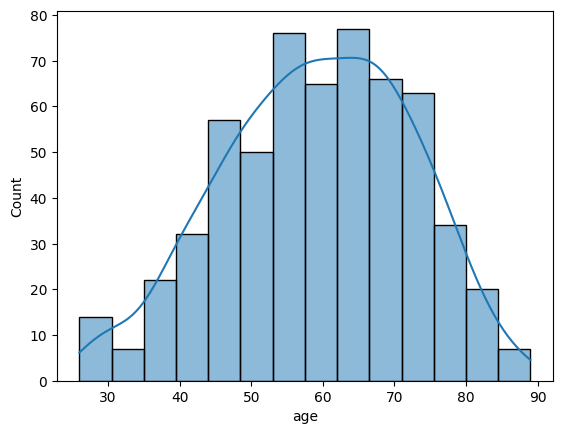

In [160]:
sns.histplot(df.age, kde = True)
plt.show()

In [161]:
df.diagnosis.value_counts()


diagnosis
2    208
3    199
1    183
Name: count, dtype: int64

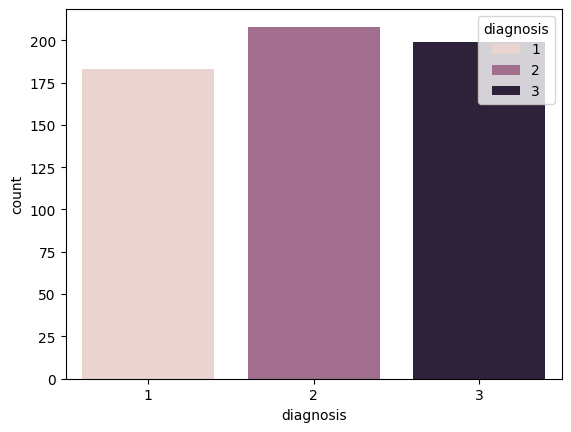

In [162]:
sns.countplot(df, x = df.diagnosis, hue = df.diagnosis)
plt.show()

Histogram plot and Box plot:  LYVE1


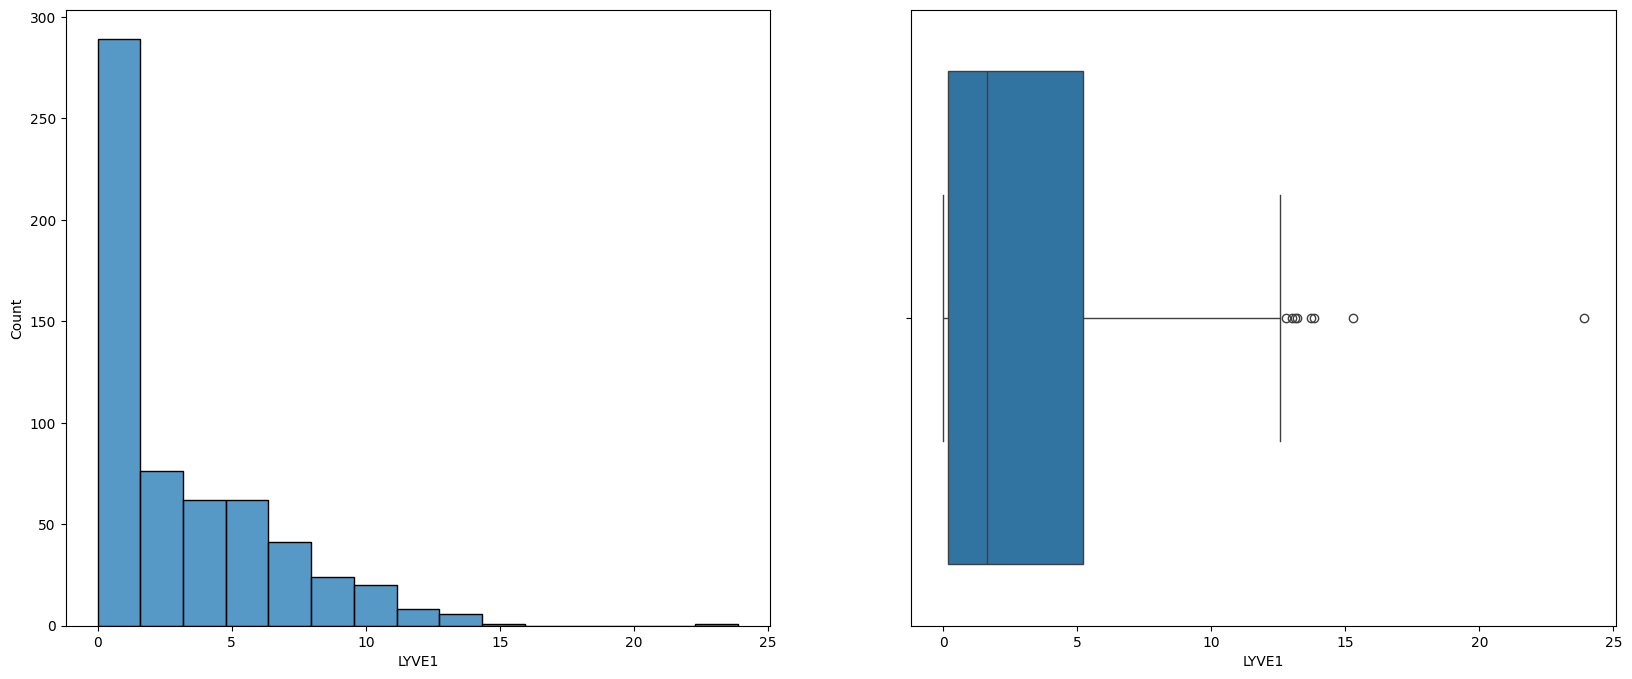

Histogram plot and Box plot:  REG1B


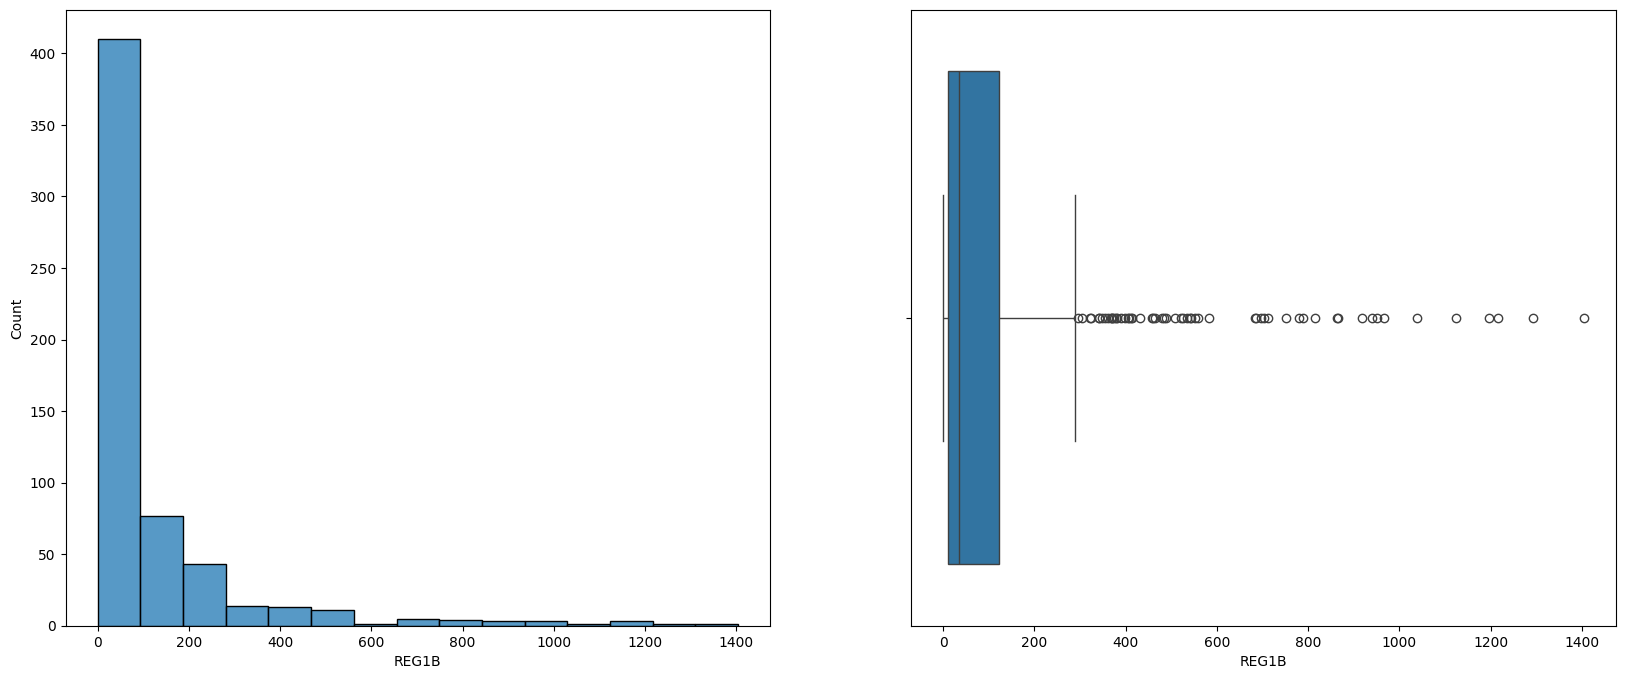

Histogram plot and Box plot:  TFF1


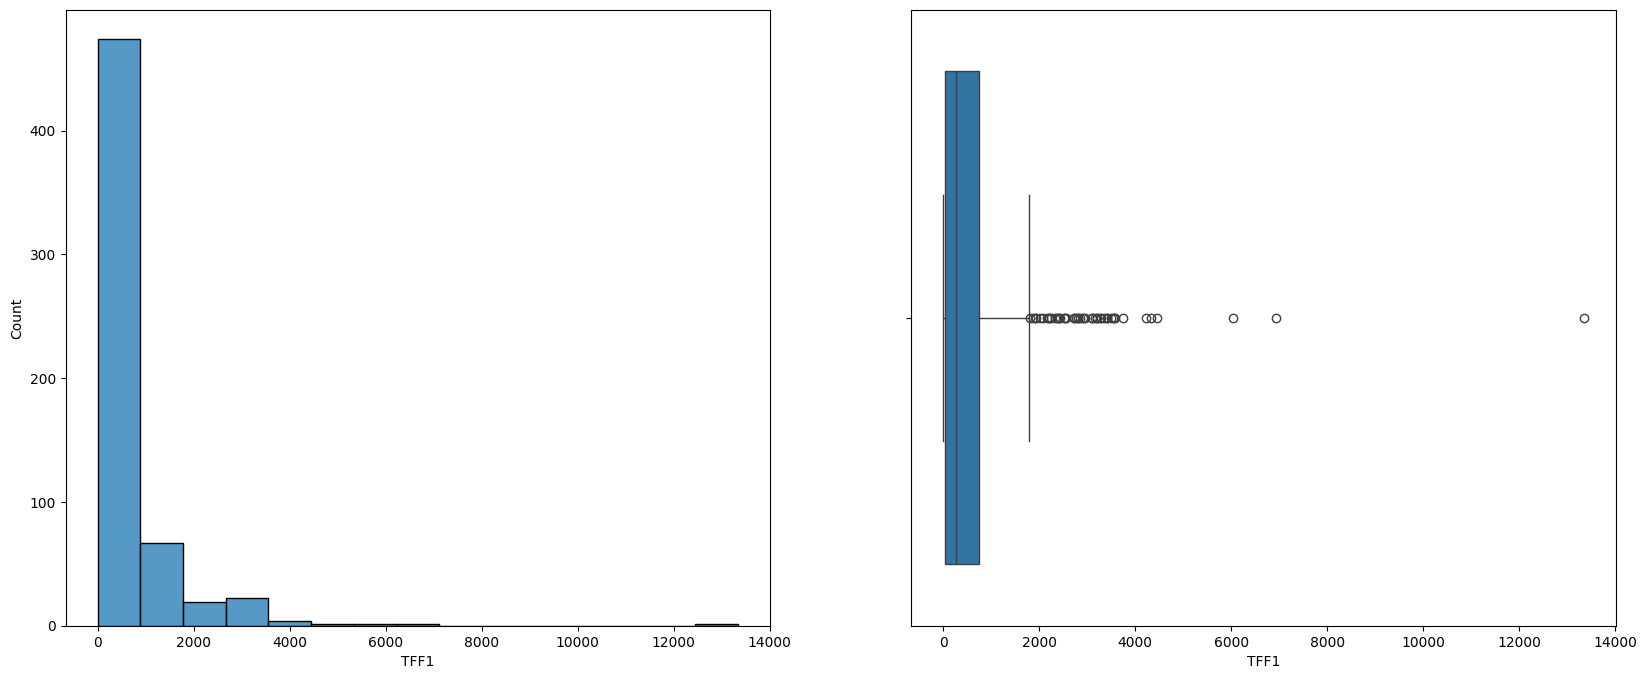

Histogram plot and Box plot:  REG1A


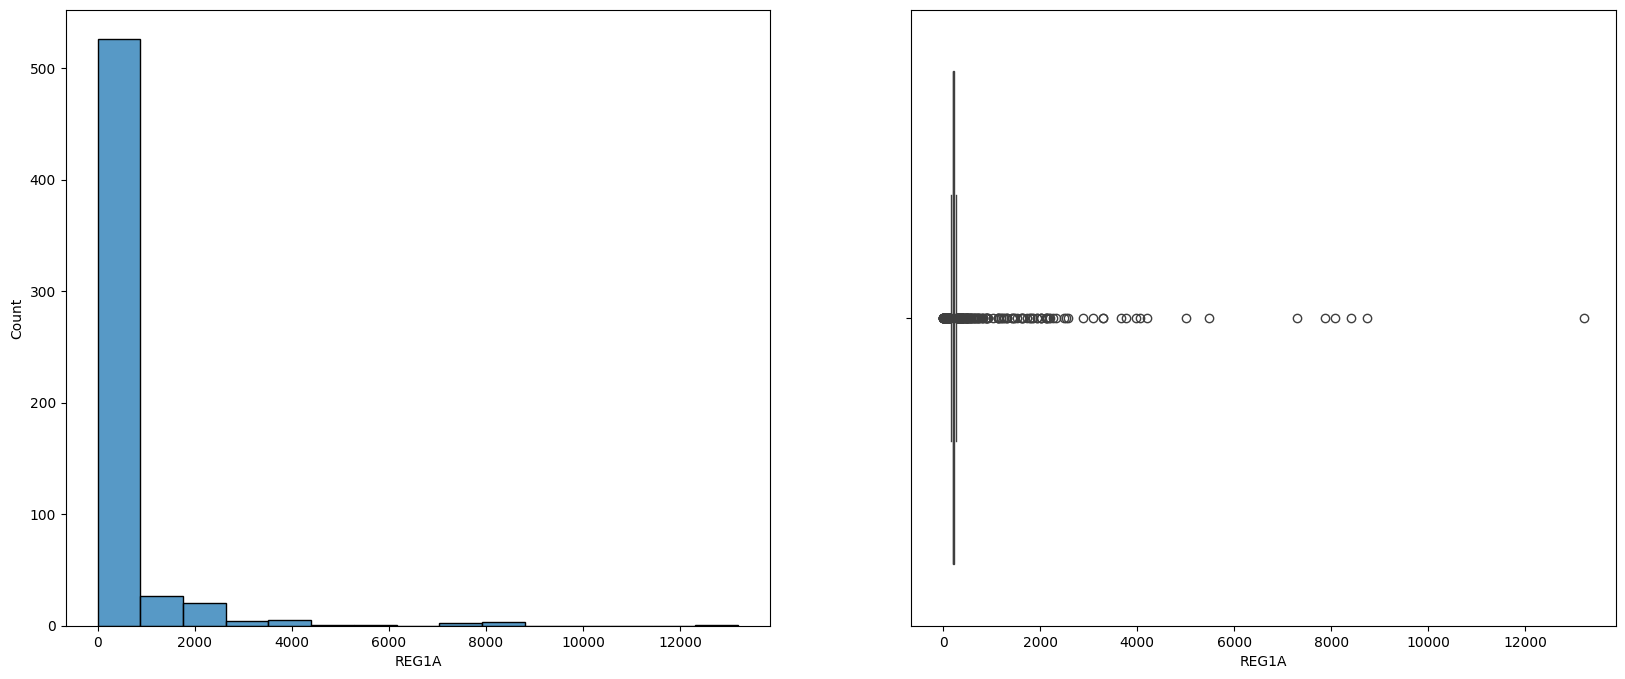

In [163]:
for col in ['LYVE1', 'REG1B', 'TFF1','REG1A']:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(df[col], ax=ax1, bins = 15)
    sns.boxplot(x = df[col], ax = ax2)
    plt.show()

In [164]:
categorical_cols = ['patient_cohort', 'sex', 'diagnosis']


In [165]:
numerical_cols = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']


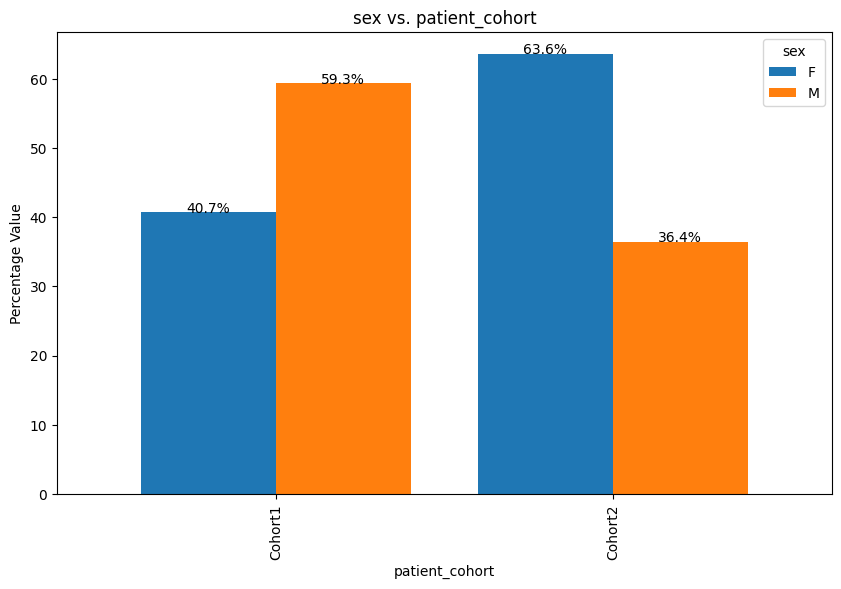

In [166]:
# Group by 'patient_cohort' and 'sex' and calculate the count
grouped = df.groupby(['patient_cohort', 'sex']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
ax = grouped_percentage.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('patient_cohort')
plt.ylabel('Percentage Value')
plt.title('sex vs. patient_cohort')

# Add legend
plt.legend(title='sex', labels = df.sex.value_counts().index)

# Add percentage values on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

# Display the plot
plt.show()

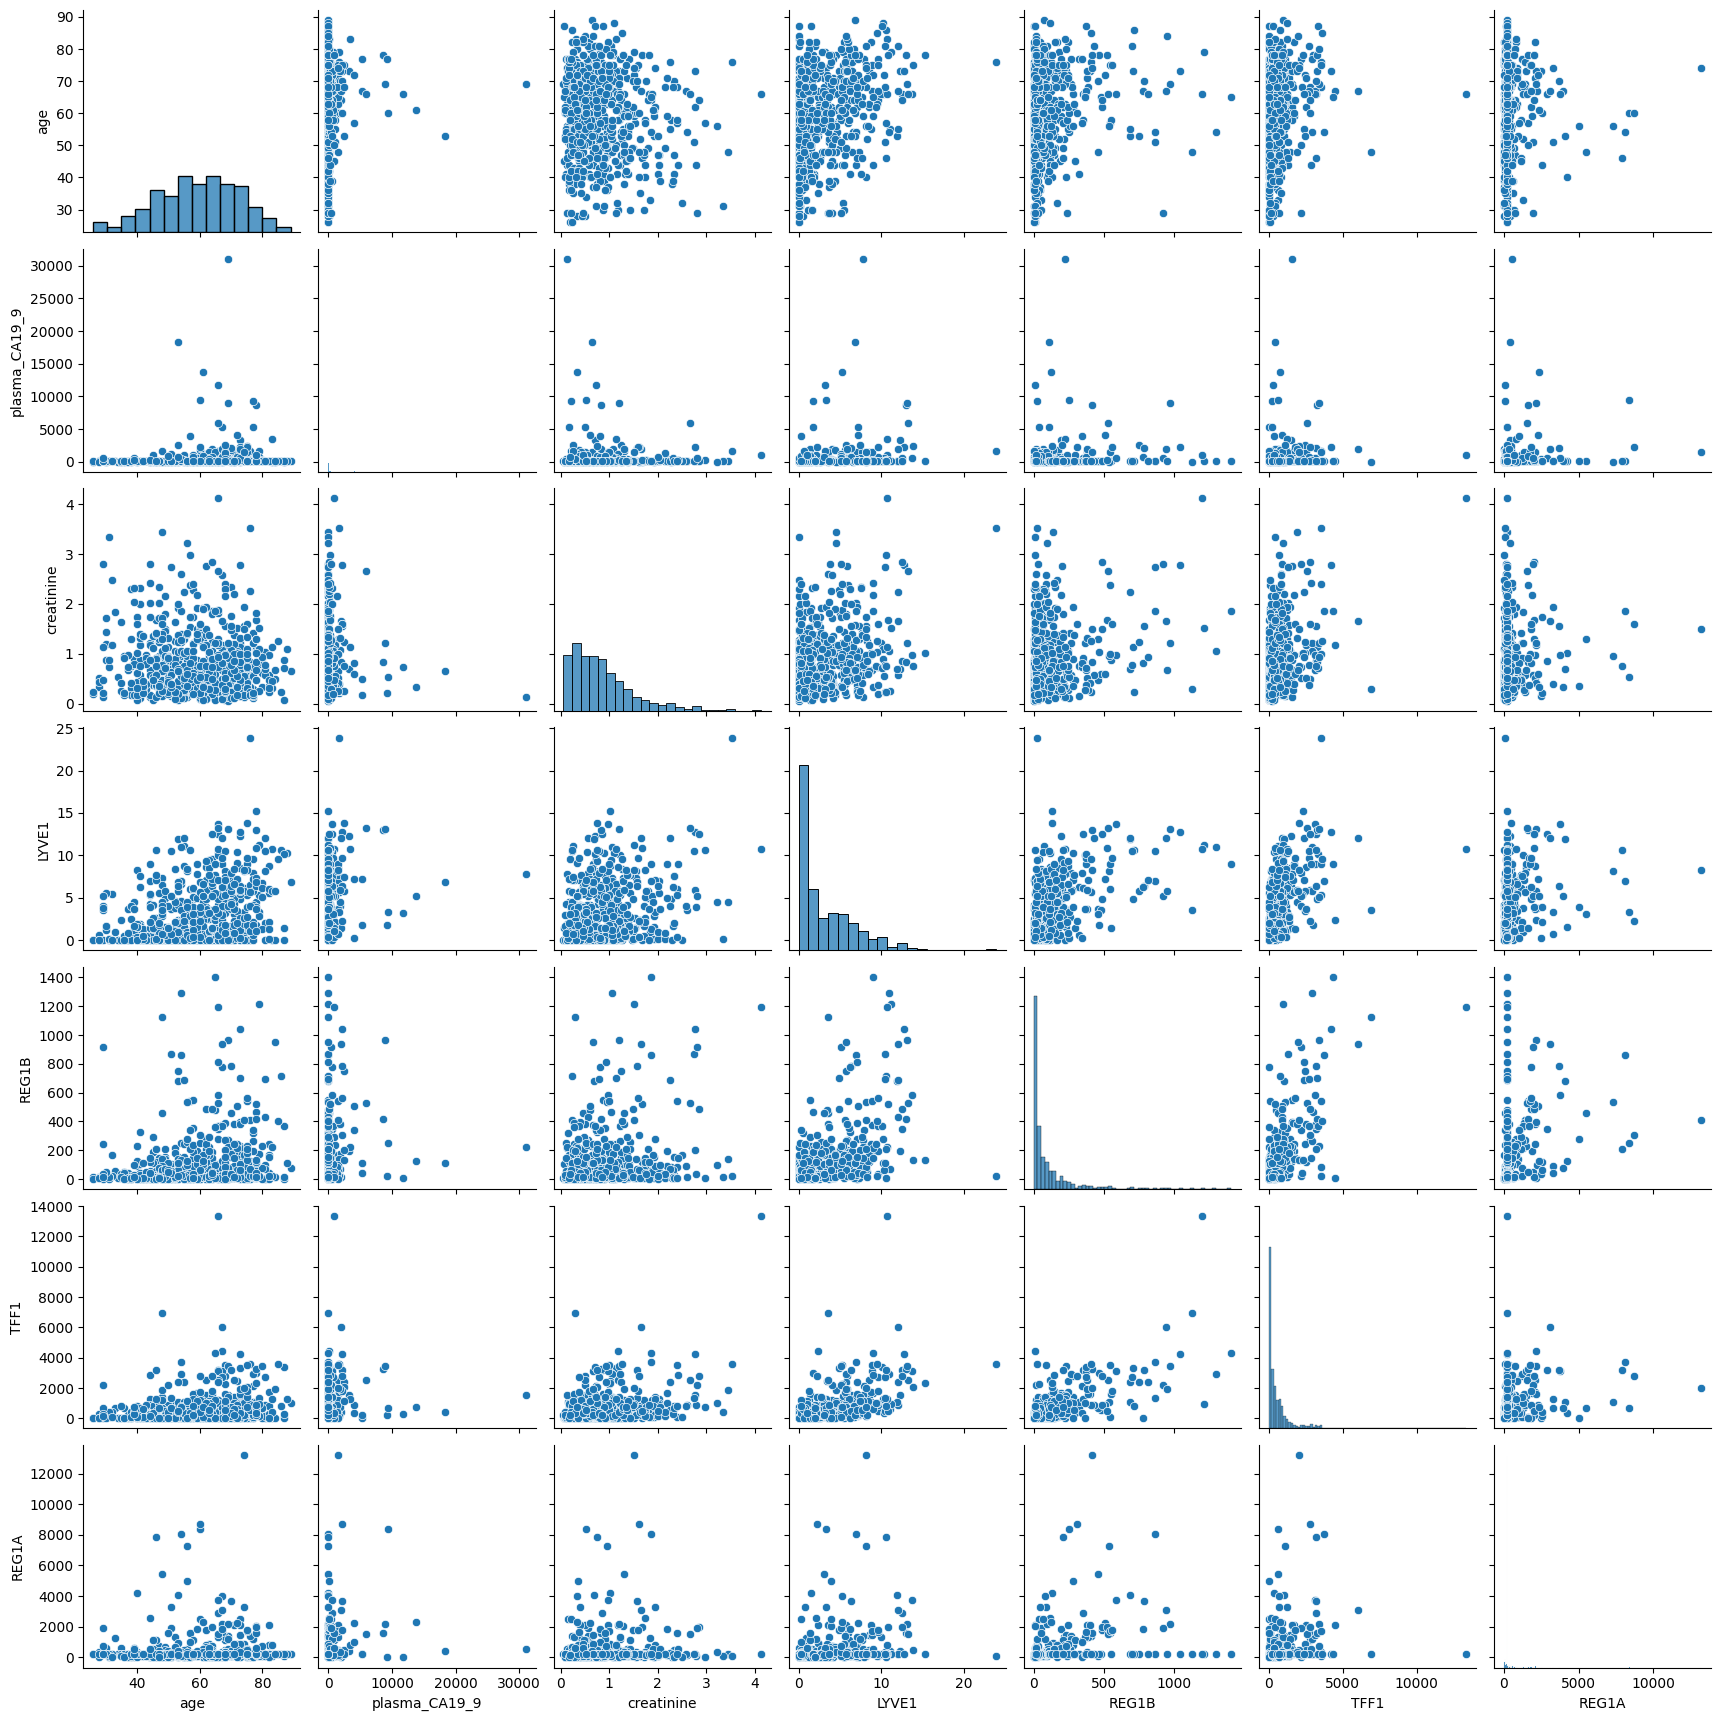

In [167]:
sns.pairplot(df[numerical_cols])


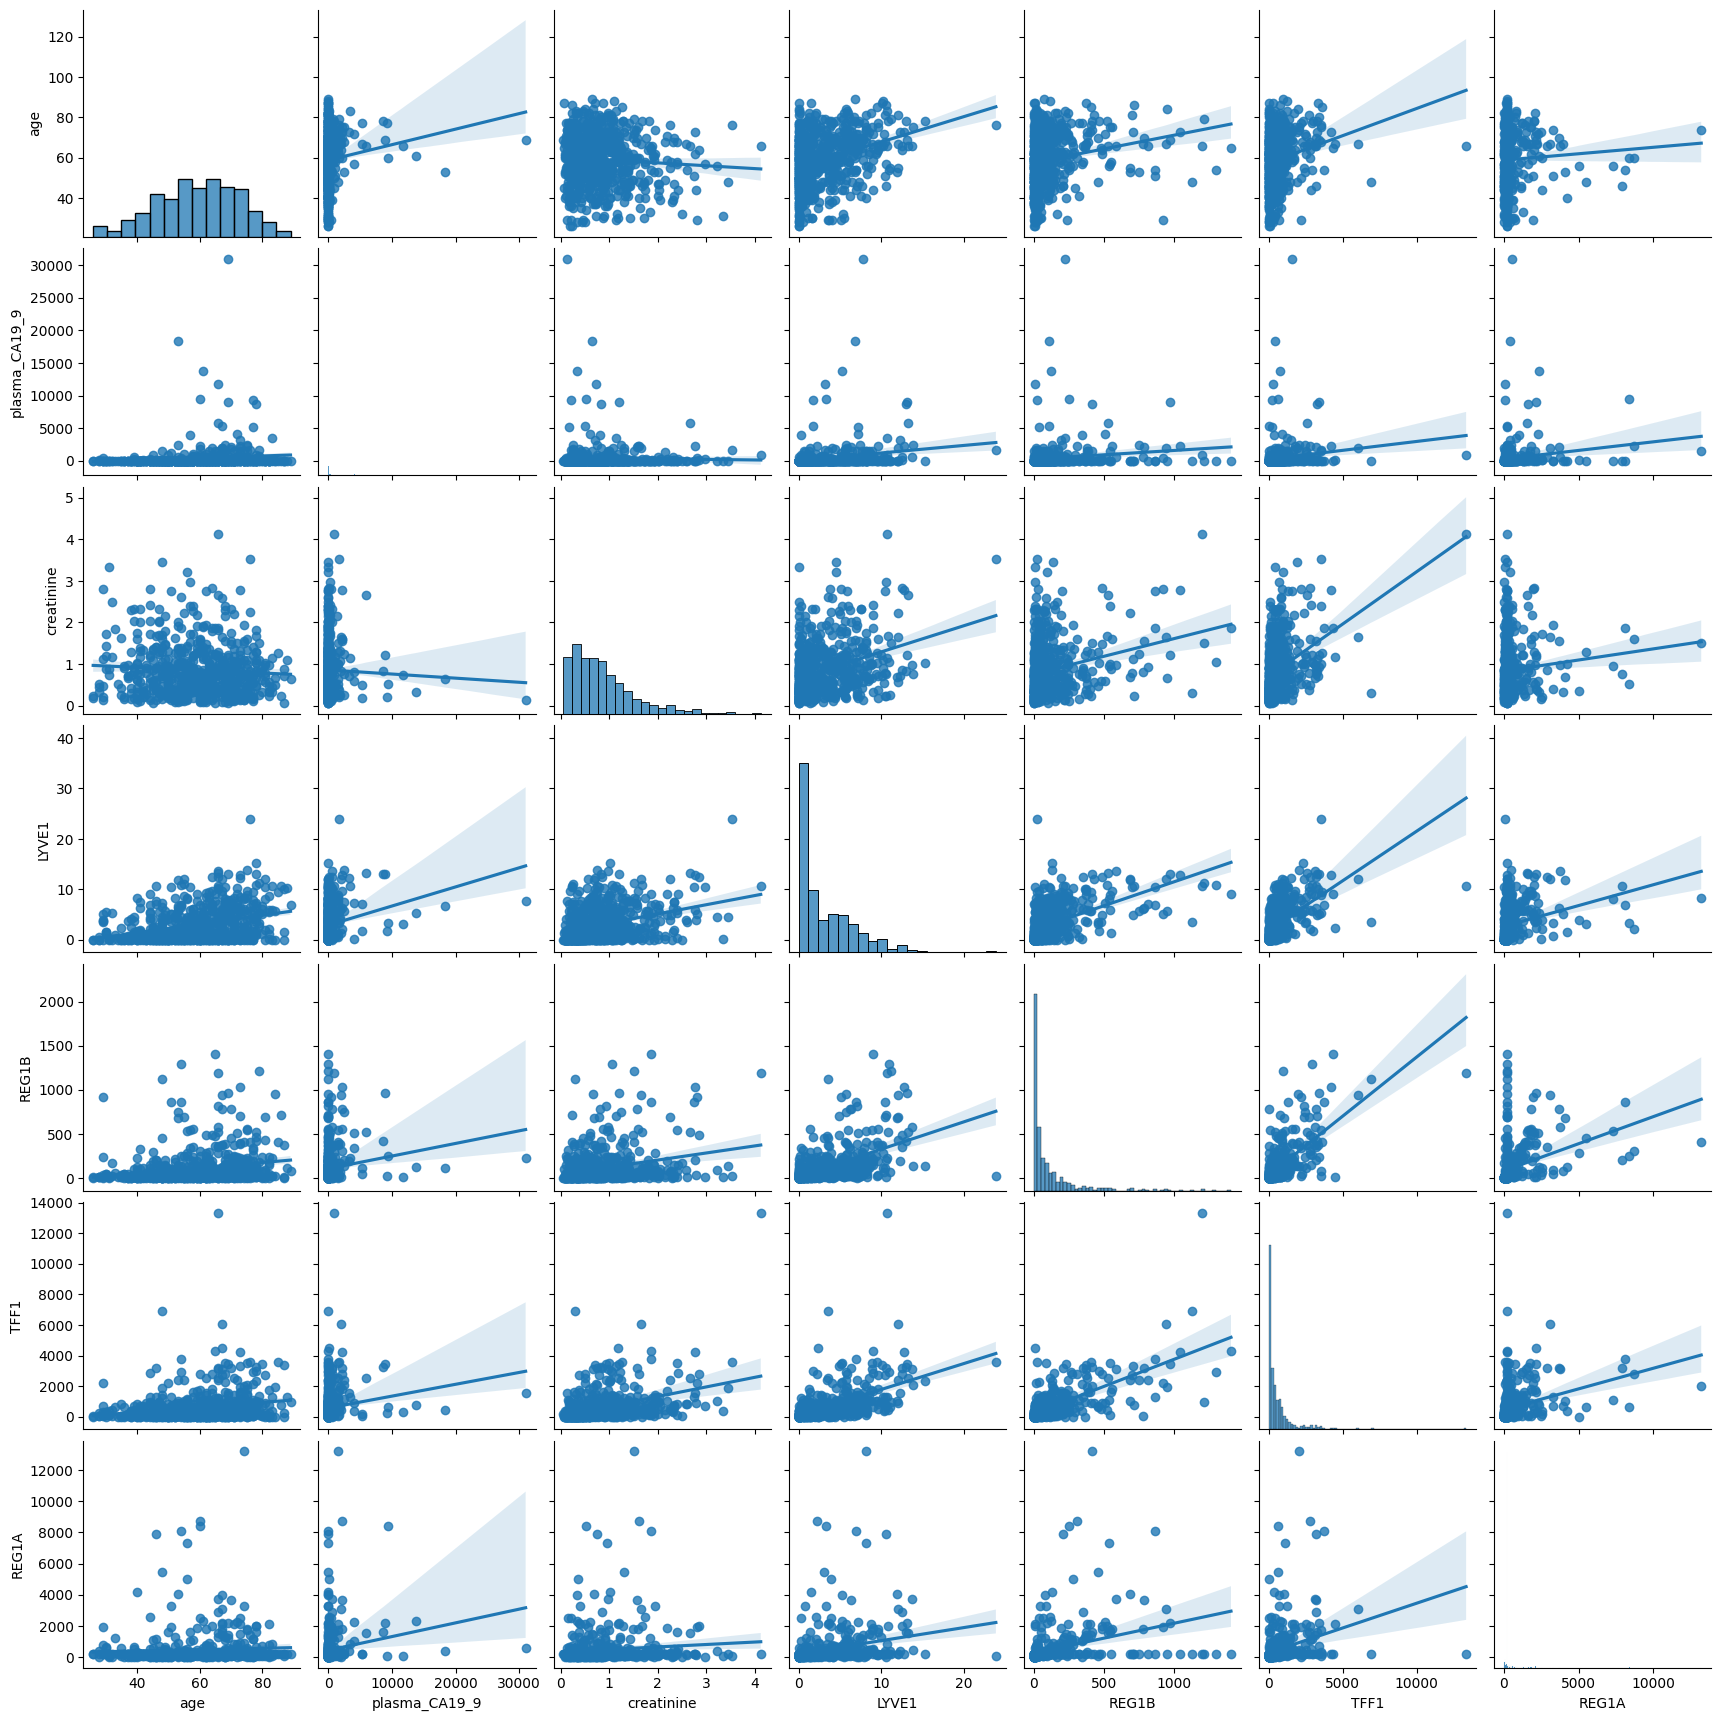

In [168]:
sns.pairplot(df[numerical_cols], kind = 'reg')


<Axes: >

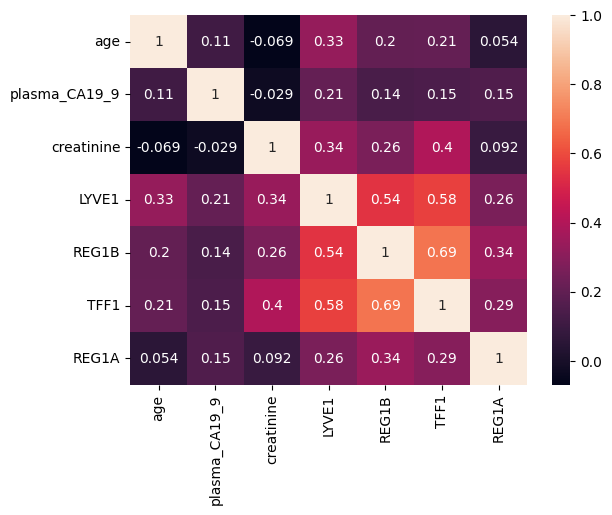

In [169]:
sns.heatmap(df[numerical_cols].corr(), annot = True)


In [170]:
df['patient_cohort_1?'] = pd.get_dummies(df['patient_cohort'], drop_first=True, dtype='int')
df.drop(columns = ['patient_cohort'], inplace=True)

In [171]:
pd.get_dummies(df['sex'], drop_first=True)


,M
0,False
1,False
2,True
3,True
4,True
...,...
585,True
586,False
587,True
588,False


In [172]:
df['is_male?'] = pd.get_dummies(df['sex'], drop_first=True, dtype = 'int')
df.drop(columns = ['sex'], inplace=True)

In [173]:
# The negative class (benign cancer)
df.diagnosis.replace(to_replace=[1,2], value=0, inplace=True)
# The positive class (malignant cancer)
df.diagnosis.replace(to_replace=3, value=1, inplace=True)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_21304\2422450082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.diagnosis.replace(to_replace=[1,2], value=0, inplace=True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_21304\2422450082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [174]:
features = df.drop("diagnosis", axis = 1) 
target = df.diagnosis

In [175]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

In [176]:
mdl_LR = LogisticRegression(max_iter=30000)


In [177]:
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [195]:
y_pred_LR = mdl_LR.predict(X_test)


In [191]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
accuracy_score(y_test, y_pred_LR)


0.903954802259887

<Axes: >

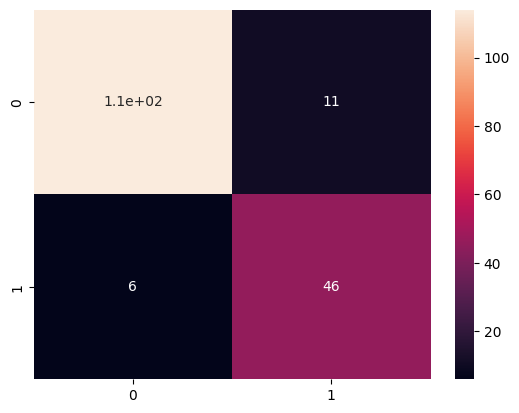

In [180]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True)


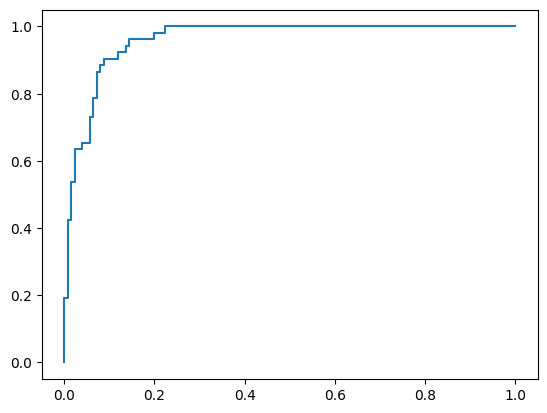

In [199]:
y_RF_pred_prob=mdl_LR.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [205]:
from sklearn.tree import DecisionTreeClassifier

mdl_DT = DecisionTreeClassifier()
mdl_DT.fit(X_train,y_train)
dt_y_pred = mdl_DT.predict(X_test)


In [188]:
accuracy_score(y_test,y_pred)

0.8418079096045198

In [189]:
from sklearn.ensemble import RandomForestClassifier

mdl_RF = RandomForestClassifier()
mdl_RF.fit(X_train,y_train)
dt_y_pred = mdl_RF.predict(X_test)


In [190]:
accuracy_score(y_test,y_pred)

0.9265536723163842

In [ ]:
y_RF_pred_prob=mdl_LR.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [208]:
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test, y_pred_LR)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, dt_y_pred)


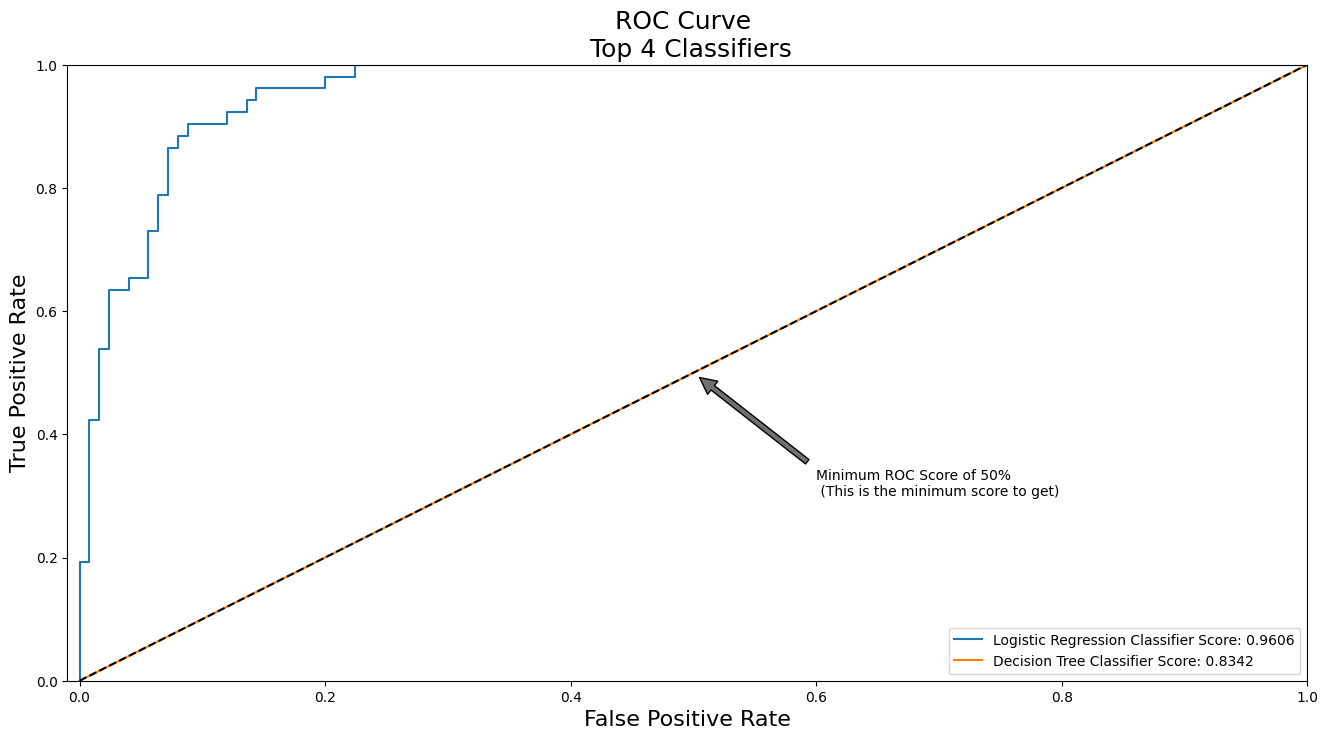

In [212]:


def graph_roc_curve_multiple(lr_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_LR)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dt_y_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lr_fpr,tree_fpr)
plt.show()